<a href="https://colab.research.google.com/github/IshaqKHATTAK/Natural-Language-Processing/blob/main/2020313_2_(1_2_3_4)b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**this notebook is for newsgroup dataset**

In [ ]:
import sklearn
import re
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

In [ ]:
all_data = fetch_20newsgroups(subset='all')
news_train_data, news_test_data, news_train_target, news_test_target = train_test_split(all_data.data, all_data.target, test_size = .20)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize(text):
  return word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def remove_stopwords(tokens):
  return [word for word in tokens if word not in sw]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')



lemetizer = WordNetLemmatizer()
def lemetize(words):
  return [lemetizer.lemmatize(word) for word in words]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def list_to_string(tokens):
  return ' '.join(tokens)

In [ ]:
def remove_digit_puncuation(text):
  text = re.sub(r'[^\w\s]','',text)
  text = re.sub('[0-9]','',text)
  return text

In [ ]:
for idx in range(len(news_train_data)):
  news_train_data[idx] = tokenize(news_train_data[idx])
  news_train_data[idx] = remove_stopwords(news_train_data[idx])
  news_train_data[idx] = lemetize(news_train_data[idx])
  news_train_data[idx] = list_to_string(news_train_data[idx])
  news_train_data[idx] = remove_digit_puncuation(news_train_data[idx])

for idx in range(len(news_test_data)):
  news_test_data[idx] = tokenize(news_test_data[idx])
  news_test_data[idx] = remove_stopwords(news_test_data[idx])
  news_test_data[idx] = lemetize(news_test_data[idx])
  news_test_data[idx] = list_to_string(news_test_data[idx])
  news_test_data[idx] = remove_digit_puncuation(news_test_data[idx])

In [ ]:
print(news_train_data[0])

From : schock @ flip.cpsc.ucalgary.ca ( Craig-Richard Schock ) Subject : Re : NHL Team Captains Reply-To : schock @ flip.cpsc.ucalgary.ca Organization : University Calgary Computer Science Lines : 14 In article < 1993Apr22.121035.3394 @ mtroyal.ab.ca > writes : > > And , subject , captain ever traded , > > resigned , striped title season ? Any > > team captain trivia would appreciated . > > Brad McCrimmon captain Flames traded Detroit > following 1989-90 season . This off-season though . > > There 's countless example captain traded , I 'm sure . Yeah ... I think Flames Flyers traded Captains ... Mel Bridgeman Brad Marsh . Craig


#2 feature extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

news_tfidf_train = tfidf.fit_transform(news_train_data)

In [ ]:
news_tfidf_test = tfidf.transform(news_test_data)

#3 model implementation

###naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mdl1 = MultinomialNB()
mdl1.fit(news_tfidf_train,news_train_target)


MultinomialNB()

In [ ]:
pred1 = mdl1.predict(news_tfidf_test)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(news_test_target, pred1)
#print(report)

In [ ]:
from sklearn.linear_model import LogisticRegression
mdl2 = LogisticRegression()
mdl2.fit(news_tfidf_train, news_train_target)
pred2 = mdl2.predict(news_tfidf_test)

In [ ]:

report2 = classification_report(news_test_target, pred2)
#print(report2)

In [ ]:
from sklearn.svm import SVC
mdl3 = SVC()
mdl3.fit(news_tfidf_train,news_train_target)
pred3 = mdl3.predict(news_tfidf_test)

In [ ]:
report3 = classification_report(news_test_target, pred3)
#print(report3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

mdl4 = RandomForestClassifier()
mdl4.fit(news_tfidf_train,news_train_target)
pred4 = mdl4.predict(news_tfidf_test)

In [ ]:
report4 = classification_report(news_test_target, pred4)
#print(report4)

#4 model comparison

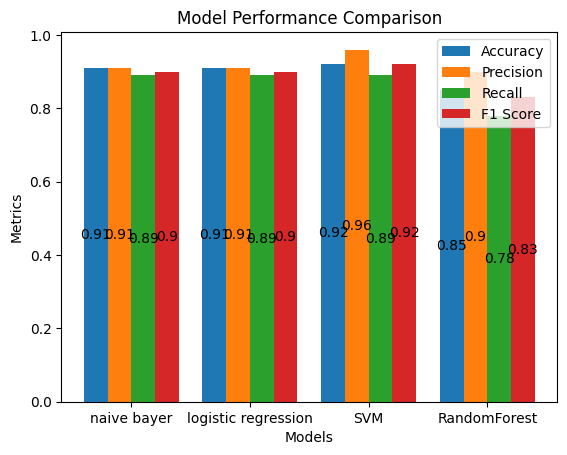

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
model_names = ['naive bayer', 'logistic regression', 'SVM', 'RandomForest']
accuracy = [.91,.91,.92,.85] 
precision = [0.91, 0.91, 0.96, 0.90]
recall = [0.89, 0.89, 0.89, 0.78]
f1_score = [0.90, 0.90, 0.92, 0.83]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create a bar chart for accuracy
fig, ax = plt.subplots()
bars1 = ax.bar(r1, accuracy, color='tab:blue', width=bar_width, label='Accuracy')
bars2 = ax.bar(r2, precision, color='tab:orange', width=bar_width, label='Precision')
bars3 = ax.bar(r3, recall, color='tab:green', width=bar_width, label='Recall')
bars4 = ax.bar(r4, f1_score, color='tab:red', width=bar_width, label='F1 Score')

# Add labels to the bars
ax.bar_label(bars1, labels=np.round(accuracy, decimals=2), label_type='center')
ax.bar_label(bars2, labels=np.round(precision, decimals=2), label_type='center')
ax.bar_label(bars3, labels=np.round(recall, decimals=2), label_type='center')
ax.bar_label(bars4, labels=np.round(f1_score, decimals=2), label_type='center')

# Add x-axis and y-axis labels
ax.set_xlabel('Models')
ax.set_ylabel('Metrics')

# Add a legend
ax.legend()

# Add the model names below the bars
ax.set_xticks([r + bar_width * 1.5 for r in range(len(model_names))])
ax.set_xticklabels(model_names)

# Set the plot title
plt.title('Model Performance Comparison')

# Show the plot
plt.show()


In [ ]:
# from the above four evaluation matrices it can be concluded that by averaging all the four matrices the best performance modell is SVM.
#the order of the model performance is 1>SVM 2>naive bayes & logistic regression 3>randomforest